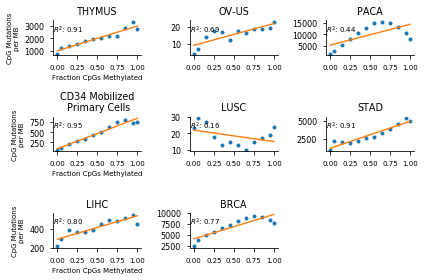

In [1]:
#version which plots graphs on one figure
from bin_ratios import *
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sys
import decimal
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use('seaborn-paper')
plt.rcParams['xtick.labelsize'] = 7

wgbs = ['GSM1010979_UCSD.Thymus.Bisulfite-Seq.STL001.wig.bed.fixed', 'GSM1010980_UCSD.Ovary.Bisulfite-Seq.STL002.wig.bed', 'GSM983651_UCSD.Pancreas.Bisulfite-Seq.STL003.wig.bed', 'GSM916052_BI.Mobilized_CD34_Primary_Cells.Bisulfite-Seq.RO_01549.wig.bed', 'GSM983647_UCSD.Lung.Bisulfite-Seq.STL002.wig.bed', 'GSM1010984_UCSD.Gastric.Bisulfite-Seq.STL003.wig.bed', 'GSM916049_BI.Adult_Liver.Bisulfite-Seq.3.wig.bed', 'GSM1127125_UCSF-UBC.Breast_Luminal_Epithelial_Cells.Bisulfite-Seq.RM066.wig.bed']
mutations = ['MALY_methylation_mutation_non-cds.bed', 'OV-US_methylation_mutation_non-cds.bed', 'PACA_methylation_mutation_non-cds.bed', 'CLLE_methylation_mutation_non-cds.bed', 'LUSC_methylation_mutation_non-cds.bed', 'STAD_methylation_mutation_non-cds.bed', 'LIHC_methylation_mutation_non-cds.bed', 'BRCA_methylation_mutation_non-cds.bed']
fig1 = plt.figure(figsize=(6,4))
if len(wgbs) == len(mutations):
    for i, (normal, mutated) in enumerate(zip(wgbs, mutations)):
        title = mutated.split('_')[0]
        if mutated.startswith('MALY'):
            title = 'THYMUS'
        if mutated.startswith('CLLE'): 
            title = "CD34 Mobilized\n Primary Cells"
            
        mutToFrequency = {} #key is bin, value is frequency of mutated CpG sites in this bin
        totalCpGFrequency = {} #key is bin, value is total frequency of CpG sites in this bin
        df = pd.read_csv(normal, sep='\t', header=None) #file containing ratios from normal tissue
        mut = pd.read_csv(mutated, sep='\t') #file containing C>T mutations in CpG's along with their corresponding rato in normal tissue  
        num_samples = mut.iloc[:, 3].nunique()
        ratios = df.iloc[:, 4]
        mut_ratios = mut['methylation_ratio']
        bin(totalCpGFrequency, ratios)
        bin(mutToFrequency, mut_ratios)
        #construct plots
        xs = np.array(sorted(list(mutToFrequency.keys())))
        ys = np.array([(mutToFrequency[x]) / (totalCpGFrequency[x] / 1000000) for x in xs]) #frequency of mutations per megabase
        slope, intercept, r_value, p_value, std_err = stats.linregress(xs, ys)
        line = slope * xs + intercept
        ax = fig1.add_subplot(3, 3, i+1)
        if i+1 == 1 or i+1 == 4 or i+1 == 7: 
            ax.set_xlabel('Fraction CpGs Methylated', fontsize=7)
            ax.set_ylabel('CpG Mutations\nper MB', fontsize=7, multialignment='center')
        ax.set_xticks([0, 0.25, 0.5, 0.75, 1]) 
        ax.plot(xs, ys, 'o', xs, line, '-', markersize=4)
        ax.set_title(title)
        #ax.text(0.2, 0.85, "P-value: %.2E" % decimal.Decimal(p_value), fontsize=6, verticalalignment='center', horizontalalignment='left', clip_on=True, transform=ax.transAxes)
        ax.text(0.17, 0.75, r'$R^2$: %.2f' % r_value ** 2, fontsize=7, verticalalignment='center', horizontalalignment='center', clip_on=True, transform=ax.transAxes)
        #ax.text(0.2, 0.75, "Slope: %.2E" % decimal.Decimal(slope), fontsize=6, verticalalignment='center', horizontalalignment='left', clip_on=True, transform=ax.transAxes)
        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
else:
    print ('Error')
    
fig1.tight_layout()
    

In [4]:
fig1.savefig('Poulos_regression_plots.png', dpi=600, bbox_inches="tight")

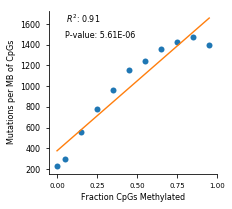

In [2]:
#make plot for MALY mutations using the tumor samples average instead of normal thymus tissue
from bin_ratios import *
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn-paper')
plt.rcParams['xtick.labelsize'] = 7
import numpy as np
from scipy import stats
import sys
import decimal
%matplotlib inline

file1 = '/data/khandekara2/cancer_WGBS/raw_data/all_CpGs_MALY_single_averaged.bed'
file2 = 'MALY_methylation_mutation_tumorAvg.bed'
mutToFrequency = {} #key is bin, value is frequency of mutated CpG sites in this bin
totalCpGFrequency = {} #key is bin, value is total frequency of CpG sites in this bin
df = pd.read_csv(file1, sep='\t')
mut = pd.read_csv(file2, sep='\t')
num_samples = mut.iloc[:, 3].nunique()
ratios = df.iloc[:, 3]
mut_ratios = mut['methylation_ratio']
bin(totalCpGFrequency, ratios)
bin(mutToFrequency, mut_ratios)
fig4 = plt.figure(figsize=(3,3))
ax = fig4.add_subplot(111)
xs = np.array(sorted(list(mutToFrequency.keys())))
ys = np.array([(mutToFrequency[x]) / (totalCpGFrequency[x] / 1000000) for x in xs]) #frequency of mutations per megabase
slope, intercept, r_value, p_value, std_err = stats.linregress(xs, ys)
line = slope * xs + intercept
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
# ax.set_aspect('equal', 'datalim')
# ax.margins(0.1) r'$R^2$'
ax.plot(xs, ys, 'o', xs, line, '-', markersize=6)
ax.set_xlabel('Fraction CpGs Methylated', fontsize=8)
ax.set_ylabel('Mutations per MB of CpGs', fontsize=8)
ax.text(0.3, 0.85, "P-value: %.2E" % decimal.Decimal(p_value), fontsize=8, verticalalignment='center', horizontalalignment='center', clip_on=True, transform=ax.transAxes)         
ax.text(0.2, 0.95, r'$R^2$: %.2f' % r_value ** 2, fontsize=8, verticalalignment='center', horizontalalignment='center', clip_on=True, transform=ax.transAxes)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


In [ ]:
fig4.savefig('MALY_Poulos_correlation.png', dpi=600)

True
4.119850190208111 1.617772827537338 0.4971925221240015 2.0897372956891e-156 0.12890502079655275


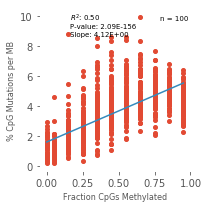

In [17]:
from bin_ratios import *
from __future__ import division
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sys
import decimal
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['axes.facecolor'] = 'w'

#now repeat with our method
file1 = '/data/khandekara2/cancer_WGBS/raw_data/all_CpGs_MALY_single_averaged.bed'
file2 = 'MALY_methylation_mutation_tumorAvg.bed'
df = pd.read_csv(file1, sep='\t')
mut = pd.read_csv(file2, sep='\t')
num_samples = mut['id'].nunique()
xToY = {0:[], 0.05:[], 0.15:[], 0.25:[], 0.35:[], 0.45:[], 0.55:[], 0.65:[], 0.75:[], 0.85:[], 0.95:[], 1:[]} #key is bin, value is list of length num_samples
totalCpGFrequency = {} #key is bin, value is total frequency of CpG sites in this bin
ratios = df.iloc[:, 3]
bin(totalCpGFrequency, ratios)
num_mutations = []
num_samples = mut['id'].nunique()
correlations = []
for sample in mut['id'].unique():
    sub_mut = mut[mut['id'] == sample] #go through each sample one by one
    num_mut = sub_mut.shape[0]
    num_mutations.append(num_mut)
    sub_mut_ratios = sub_mut.iloc[:, 3]
    mutToFrequency = {} #key is bin, value is frequency of mutated CpG sites in this bin
    bin(mutToFrequency, sub_mut_ratios)
    x_val = []
    y_val = []
    for key in sorted(mutToFrequency.keys()):
        xToY[key].append((mutToFrequency[key] / num_mut) * 100 / (totalCpGFrequency[key] / 1000000)) #normalized count of mutations for this specific sample is appended to appropiate bin
        x_val.append(key)
        y_val.append((mutToFrequency[key] / num_mut) * 100 / (totalCpGFrequency[key] / 1000000))
    slope, intercept, r_value, p_value, std_err = stats.linregress(x_val, y_val)
    correlations.append(r_value ** 2)

xs = []       
ys = []
for key in sorted(xToY.keys()):
    for k in xToY[key]:
        if k != 0:
            xs.append(key)
            ys.append(k)
        
print (len(xs) == len(ys))
xs = np.array(xs)
ys = np.array(ys)
slope, intercept, r_value, p_value, std_err = stats.linregress(xs, ys)
print(slope, intercept, r_value ** 2, p_value, std_err)
line = slope * xs + intercept

#construct plot
fig3 = plt.figure(figsize=(3,3))
ax = fig3.add_subplot(111)
ax.set_xticks([0, 0.25, 0.5, 0.75, 1])
ax.set_xlabel('Fraction CpGs Methylated', fontsize=8)
ax.set_ylabel('% CpG Mutations per MB', fontsize=8)
ax.plot(xs, ys, 'o', xs, line, '-', markersize=4)
ax.text(0.2, 0.9, "P-value: %.2E" % decimal.Decimal(p_value), fontsize=7, verticalalignment='center', horizontalalignment='left', clip_on=True, transform=ax.transAxes)
ax.text(0.2, 0.95, r'$R^2$: %.2f' % r_value ** 2, fontsize=7, verticalalignment='center', horizontalalignment='left', clip_on=True, transform=ax.transAxes)
ax.text(0.2, 0.85, "Slope: %.2E" % decimal.Decimal(slope), fontsize=7, verticalalignment='center', horizontalalignment='left', clip_on=True, transform=ax.transAxes)
ax.text(0.8, 0.95, "n = " + str(num_samples), fontsize=7, verticalalignment='center', horizontalalignment='left', clip_on=True, transform=ax.transAxes)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
fig3.tight_layout()

In [18]:
fig3.savefig('MALY_scatterplot.png', dpi=600)

In [5]:
#plot 



NameError: name 'num_mut' is not defined

In [18]:
!pwd

/spin1/users/khandekara2/normal_WGBS/processed_data/methylation_mutation


True
True
True
True
True
True
True


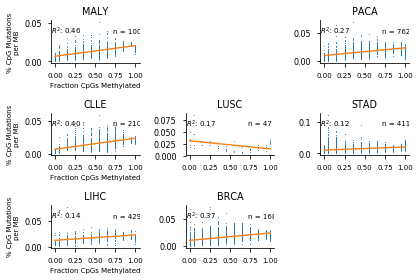

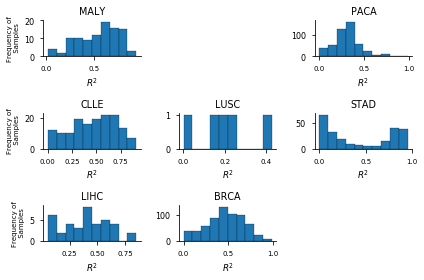

In [10]:
from __future__ import division
from bin_ratios import *
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sys
import decimal
plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use('seaborn-paper')
plt.rcParams['xtick.labelsize'] = 7


wgbs = ['GSM1010979_UCSD.Thymus.Bisulfite-Seq.STL001.wig.bed', 'GSM1010980_UCSD.Ovary.Bisulfite-Seq.STL002.wig.bed', 'GSM983651_UCSD.Pancreas.Bisulfite-Seq.STL003.wig.bed', 'GSM916052_BI.Mobilized_CD34_Primary_Cells.Bisulfite-Seq.RO_01549.wig.bed', 'GSM983647_UCSD.Lung.Bisulfite-Seq.STL002.wig.bed', 'GSM1010984_UCSD.Gastric.Bisulfite-Seq.STL003.wig.bed', 'GSM916049_BI.Adult_Liver.Bisulfite-Seq.3.wig.bed', 'GSM1127125_UCSF-UBC.Breast_Luminal_Epithelial_Cells.Bisulfite-Seq.RM066.wig.bed', 'GSM983649_UCSD.Esophagus.Bisulfite-Seq.STL003.wig.bed.fixed']
mutations = ['MALY_methylation_mutation_non-cds.bed', 'OV-US_methylation_mutation_non-cds.bed', 'PACA_methylation_mutation_non-cds.bed', 'CLLE_methylation_mutation_non-cds.bed', 'LUSC_methylation_mutation_non-cds.bed', 'STAD_methylation_mutation_non-cds.bed', 'LIHC_methylation_mutation_non-cds.bed', 'BRCA_methylation_mutation_non-cds.bed']
fig = plt.figure(figsize=(6,4))
fig2 = plt.figure(figsize=(6,4))
for i, (normal, mutated) in enumerate(zip(wgbs, mutations)):
    df = pd.read_csv(normal, sep='\t', header=None)
    mut = pd.read_csv(mutated, sep='\t')
    title = mutated.split('_')[0]
    num_samples = mut['id'].nunique()
    xToY = {0:[], 0.05:[], 0.15:[], 0.25:[], 0.35:[], 0.45:[], 0.55:[], 0.65:[], 0.75:[], 0.85:[], 0.95:[], 1:[]} #key is bin, value is list of length num_samples
    totalCpGFrequency = {} #key is bin, value is total frequency of CpG sites in this bin
    ratios = df.iloc[:, 4]
    bin(totalCpGFrequency, ratios)
    num_mutations = []
    correlations = []
    num_samples = mut['id'].nunique()
    for sample in mut['id'].unique():
        sub_mut = mut[mut['id'] == sample] #go through each sample one by one
        num_mut = sub_mut.shape[0]
        if num_mut >= 50:
            num_mutations.append(num_mut)
            sub_mut_ratios = sub_mut['methylation_ratio']
            mutToFrequency = {} #key is bin, value is frequency of mutated CpG sites in this bin
            bin(mutToFrequency, sub_mut_ratios)
            x_val = []
            y_val = []
            for key in sorted(mutToFrequency.keys()):
                xToY[key].append((mutToFrequency[key] / num_mut) / (totalCpGFrequency[key] / 1000000)) #normalized count of mutations for this specific sample is appended to appropiate bin
                x_val.append(key)
                y_val.append((mutToFrequency[key] / num_mut) * 100 / (totalCpGFrequency[key] / 1000000))
            slope, intercept, r_value, p_value, std_err = stats.linregress(x_val, y_val)
            correlations.append(r_value ** 2)
    if len(num_mutations) == 0:
        continue
    #plot histogram of correlations for each sample (we have many samples for each cancer type)
    ax2 = fig2.add_subplot(3, 3, i+1)
    ax2.hist(correlations, edgecolor="k")
    ax2.set_title(title)
    if i+1 == 1 or i+1 == 4 or i+1 == 7:
        ax2.set_ylabel('Frequency of\n Samples', fontsize=7)
    ax2.set_xlabel(r'$R^2$')
    ax2.spines['top'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    
    xs = []       
    ys = []
    for key in sorted(xToY.keys()):
        for k in xToY[key]:
            if k != 0:
                xs.append(key)
                ys.append(k)

    print (len(xs) == len(ys))
    xs = np.array(xs)
    ys = np.array(ys)
    slope, intercept, r_value, p_value, std_err = stats.linregress(xs, ys)
#     print(slope, intercept, r_value ** 2, p_value, std_err)
    line = slope * xs + intercept

    #construct plot
    ax = fig.add_subplot(3, 3, i+1)
    if i+1 == 1 or i+1 == 4 or i+1 == 7: 
        ax.set_xlabel('Fraction CpGs Methylated', fontsize=7)
        ax.set_ylabel('% CpG Mutations\nper MB', fontsize=7, multialignment='center')
    ax.set_xticks([0, 0.25, 0.5, 0.75, 1]) 
    ax.plot(xs, ys, 'o', xs, line, '-', markersize=1)
    ax.set_title(title)
    #ax.text(0.2, 0.85, "P-value: %.2E" % decimal.Decimal(p_value), fontsize=6, verticalalignment='center', horizontalalignment='left', clip_on=True, transform=ax.transAxes)
    ax.text(0.17, 0.75, r'$R^2$: %.2f' % r_value ** 2, fontsize=7, verticalalignment='center', horizontalalignment='center', clip_on=True, transform=ax.transAxes)
    #ax.text(0.2, 0.75, "Slope: %.2E" % decimal.Decimal(slope), fontsize=6, verticalalignment='center', horizontalalignment='left', clip_on=True, transform=ax.transAxes)
    ax.text(0.7, 0.75, "n = " + str(num_samples), fontsize=7, verticalalignment='center', horizontalalignment='left', clip_on=True, transform=ax.transAxes)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
fig.tight_layout()
fig2.tight_layout()
# plt.subplots_adjust(wspace = 0.125, hspace=0.125)

In [6]:
print (num_samples)

88


In [ ]:
# fig.savefig('scatterplots.png', dpi=600, bbox_inches="tight")
fig2.savefig('correlation_distributions.png', dpi=600, bbox_inches="tight")

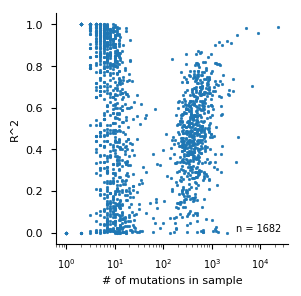

In [23]:
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use('seaborn-paper')
plt.rcParams['xtick.labelsize'] = 7
fig6 = plt.figure(figsize=(3,3))
ax6 = fig6.add_subplot(111)
ax6.scatter(num_mutations, correlations, s=4)
ax6.set_xlabel('# of mutations in sample', fontsize=8)
ax6.set_ylabel('R^2', fontsize=8)
ax6.text(0.5, 0.75, "n = " + str(1682), fontsize=7, verticalalignment='center', horizontalalignment='left', clip_on=True, transform=ax.transAxes)
ax6.spines['top'].set_visible(False)
ax6.spines['right'].set_visible(False)
ax6.set_xscale('log')


In [24]:
fig6.savefig('/data/khandekara2/figures/mutations_vs_R2.png', dpi=600, bbox_inches="tight")
    

In [21]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import numpy as np

x = np.random.rand(50)
y = np.random.rand(50)

fig = plt.figure()

gs = GridSpec(4,4)

ax_joint = fig.add_subplot(gs[1:4,0:3])
ax_marg_x = fig.add_subplot(gs[0,0:3])
ax_marg_y = fig.add_subplot(gs[1:4,3])

ax_joint.scatter(x,y)
ax_marg_x.hist(x)
ax_marg_y.hist(y,orientation="horizontal")

# Turn off tick labels on marginals
plt.setp(ax_marg_x.get_xticklabels(), visible=False)
plt.setp(ax_marg_y.get_yticklabels(), visible=False)

# Set labels on joint
ax_joint.set_xlabel('Joint x label')
ax_joint.set_ylabel('Joint y label')

# Set labels on marginals
ax_marg_y.set_xlabel('Marginal x label')
ax_marg_x.set_ylabel('Marginal y label')
plt.show()

In [37]:
non_zero = [y for y in ys if y < 1]
print (len(non_zero))

3320


In [18]:
print(plt.style.available)

['Solarize_Light2', '_classic_test', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'tableau-colorblind10']


In [8]:
for letter in 'jDango':    
    if letter == 'D':
        print ('Current Letter:', letter)

Current Letter: D


In [7]:
print (num_mutations)

[2006, 271, 1456, 1419, 1359, 1606, 659, 4190, 561, 862, 1275, 723, 170, 454, 391, 1478, 1009, 258, 278, 696, 557, 408, 875, 755, 2415, 511, 759, 1281, 199, 350, 1131, 1241, 802, 915, 249, 2018, 1351, 863, 306, 901, 481, 1153, 830, 613, 1140, 337, 153, 1012, 619, 624, 1434, 414, 311, 1773, 266, 178, 405, 311, 598, 310, 1254, 496, 217, 552, 489, 808, 976, 1022, 571, 1068, 356, 447, 418, 647, 1192, 453, 469, 1706, 489, 210, 658, 429, 515, 677, 373, 209, 502, 295, 272, 364, 878, 328, 147, 296, 448, 499, 460, 703, 242, 299]
